In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
data_path_krat_control = 'owl_data/control_sim_0_krat_info.csv'
data_path_snake_control = 'owl_data/control_sim_0_snake_info.csv'
kratdata=pd.read_csv(data_path_krat_control,header=None)
kratdata.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
snakedata=pd.read_csv(data_path_snake_control,header=None)
snakedata.columns = ['snake_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']
#kratdata.sort_values(by=['owls_in_cell'], ascending=False).head(20)
#snakedata.head().sort_values(by=['owls_in_cell'], ascending=False)
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb
def round_down(x, a):
    return round(math.floor(x / a) * a,2)


In [4]:
#snakedata[snakedata['cycle']==75].head(20)
kratdata['generation'].max()

199800

In [2]:
#### EXP 1
data_path_krat_exp_1 = 'owl_data/experiment_1_sim_0_krat_info.csv'
data_path_snake_exp_1  = 'owl_data/experiment_1_sim_0_snake_info.csv'
exp1_kratdata=pd.read_csv(data_path_krat_exp_1 ,header=None)
exp1_kratdata.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
exp1_snakedata=pd.read_csv(data_path_snake_exp_1 ,header=None)
exp1_snakedata.columns = ['snake_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']

#### EXP 2
data_path_krat_exp_2 = 'owl_data/experiment_2_sim_0_krat_info.csv'
data_path_snake_exp_2  = 'owl_data/experiment_2_sim_0_snake_info.csv'
exp2_kratdata=pd.read_csv(data_path_krat_exp_2 ,header=None)
exp2_kratdata.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
exp2_snakedata=pd.read_csv(data_path_snake_exp_2 ,header=None)
exp2_snakedata.columns = ['snake_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']

#### EXP 3
data_path_krat_exp_3 = 'owl_data/experiment_3_sim_0_krat_info.csv'
data_path_snake_exp_3  = 'owl_data/experiment_3_sim_0_snake_info.csv'
exp3_kratdata=pd.read_csv(data_path_krat_exp_3 ,header=None)
exp3_kratdata.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
exp3_snakedata=pd.read_csv(data_path_snake_exp_3 ,header=None)
exp3_snakedata.columns = ['snake_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']

In [8]:
## Krat individual check
#kratdata.head()
# idoi = 2267458398536
ktemp = kratdata#[kratdata['bush_pw']==0]
ktemp = ktemp[ktemp['cycle']>=51]
ktemp.head(50)

,krat_id,generation,cycle,open_pw,bush_pw,energy_score,movements,cell_id,microhabitat,snakes_in_cell,owls_in_cell
561,140383476902448,200,75,0.0,1.0,120,24,"(0, 2)",BUSH,0,0
562,140383476901968,200,75,0.0,1.0,108,24,"(0, 4)",BUSH,0,0
563,140383476872528,200,75,1.0,0.0,-36,24,"(0, 6)",OPEN,3,0
564,140383477129120,200,75,1.0,0.0,120,24,"(0, 6)",OPEN,3,0
565,140383477206608,200,75,1.0,0.0,120,24,"(0, 6)",OPEN,3,0
566,140383477203008,200,75,1.0,0.0,120,24,"(0, 7)",OPEN,0,0
567,140383476873392,200,75,1.0,0.0,120,24,"(0, 8)",OPEN,0,0
568,140383477126960,200,75,0.0,1.0,48,24,"(0, 11)",BUSH,0,0
569,140383477206320,200,75,0.0,1.0,120,24,"(0, 11)",BUSH,0,0
570,140383476875120,200,75,0.0,1.0,-48,24,"(0, 11)",BUSH,0,0


In [11]:
## snake individual check
# idoi = 2125413594440
# stemp = snakedata[snakedata['snake_id']==idoi]
stemp = snakedata#[kratdata['bush_pw']==0]
stemp = stemp[stemp['cycle']==1]
stemp.head(55)
#stemp.head(50)

,snake_id,cycle,open_pw,bush_pw,energy_score,movements,cell_id,microhabitat,krats_in_cell,owls_in_cell


Text(0.5, 1.0, 'Snake Count')

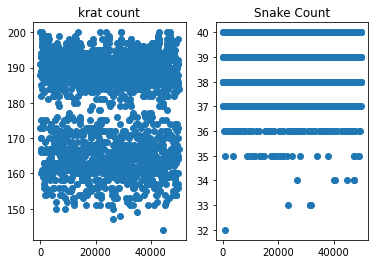

In [6]:
########## Population Counts ###############
df = kratdata[["cycle", "krat_id"]].groupby("cycle").krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','krats']
df2 = snakedata[["cycle", "snake_id"]].groupby("cycle").snake_id.nunique()
df2 = df2.reset_index()
df2.columns = ['cycle','snakes']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].scatter(df['cycle'], df['krats'])
axs[0].set_title('krat count')

axs[1].scatter(df2['cycle'], df2['snakes'])
axs[1].set_title('Snake Count')

In [16]:
################# Total Sim Bar Chart: Control ########################

krat_bush_avg = kratdata['bush_pw'].mean()
krat_open_avg = 1 - kratdata['bush_pw'].mean()
krat_sterror = kratdata['bush_pw'].sem()
#print(krat_sterror)
snake_bush_avg = snakedata['bush_pw'].mean()
snake_open_avg = 1 - snakedata['bush_pw'].mean()
snake_sterror = snakedata['bush_pw'].sem()
labels = ['Kangaroo Rat', 'Rattlesnake']
bush_means = [krat_bush_avg, snake_bush_avg]
open_means = [krat_open_avg, snake_open_avg]
bush_std = [krat_sterror, snake_sterror]

################# Total Sim Bar Chart: exp1 ########################

exp1_krat_bush_avg = exp1_kratdata['bush_pw'].mean()
exp1_krat_open_avg = 1 - exp1_kratdata['bush_pw'].mean()
exp1_krat_sterror = exp1_kratdata['bush_pw'].sem()
#print(krat_sterror)
exp1_snake_bush_avg = exp1_snakedata['bush_pw'].mean()
exp1_snake_open_avg = 1 - exp1_snakedata['bush_pw'].mean()
exp1_snake_sterror = exp1_snakedata['bush_pw'].sem()

################# Total Sim Bar Chart: exp2 ########################

exp2_krat_bush_avg = exp2_kratdata['bush_pw'].mean()
exp2_krat_open_avg = 1 - exp2_kratdata['bush_pw'].mean()
exp2_krat_sterror = exp2_kratdata['bush_pw'].sem()
#print(krat_sterror)
exp2_snake_bush_avg = exp2_snakedata['bush_pw'].mean()
exp2_snake_open_avg = 1 - exp2_snakedata['bush_pw'].mean()
exp2_snake_sterror = exp2_snakedata['bush_pw'].sem()


################# Total Sim Bar Chart: exp3 ########################

exp3_krat_bush_avg = exp3_kratdata['bush_pw'].mean()
exp3_krat_open_avg = 1 - exp3_kratdata['bush_pw'].mean()
exp3_krat_sterror = exp3_kratdata['bush_pw'].sem()
#print(krat_sterror)
exp3_snake_bush_avg = exp3_snakedata['bush_pw'].mean()
exp3_snake_open_avg = 1 - exp3_snakedata['bush_pw'].mean()
exp3_snake_sterror = exp3_snakedata['bush_pw'].sem()


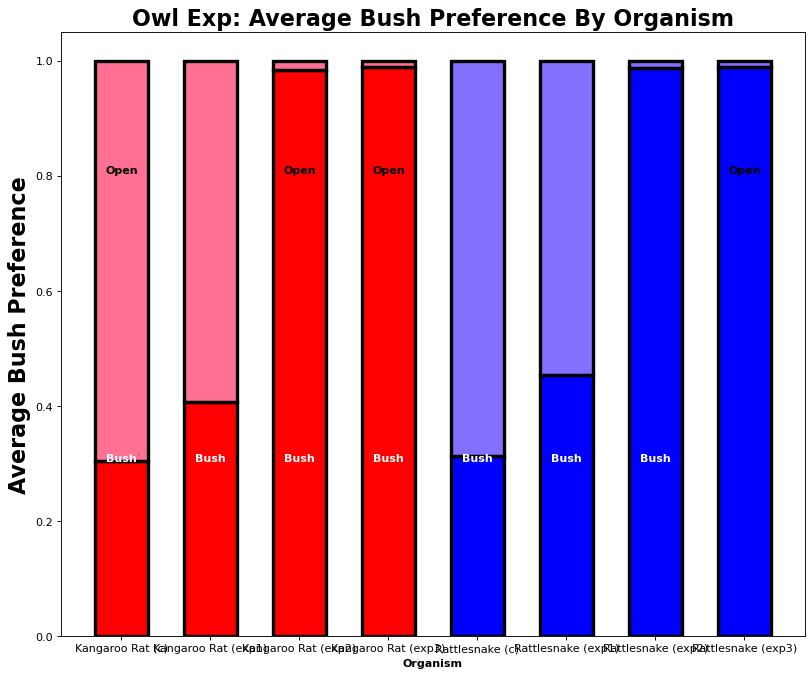

In [18]:
################ Graph #######
labels = ['Kangaroo Rat (c)','Kangaroo Rat (exp1)','Kangaroo Rat (exp2)','Kangaroo Rat (exp3)', 'Rattlesnake (c)', 'Rattlesnake (exp1)', 'Rattlesnake (exp2)', 'Rattlesnake (exp3)']
bush_means = [krat_bush_avg, exp1_krat_bush_avg, exp2_krat_bush_avg, exp3_krat_bush_avg, snake_bush_avg, exp1_snake_bush_avg, exp2_snake_bush_avg, exp3_snake_bush_avg]
open_means = [krat_open_avg, exp1_krat_open_avg, exp2_krat_open_avg, exp3_krat_open_avg, snake_open_avg,  exp1_snake_open_avg, exp2_snake_open_avg, exp3_snake_open_avg]
bush_std = [krat_sterror,exp1_krat_sterror, exp2_krat_sterror, exp3_krat_sterror, snake_sterror, exp1_snake_sterror, exp2_snake_sterror, exp3_snake_sterror]

width = 0.6       # the width of the bars: can also be len(x) sequence
bush_color = [(1,0,0),(1,0,0),(1,0,0), (1,0,0),(0,0,1),(0,0,1), (0,0,1), (0,0,1)]
fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
font = {'weight' : 'normal',
        'size'   : 10,
        'axes.titlesize' : 32,
        'axes.labelsize' : 18,
        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
#plt.rc('font', font**)
plt.rcParams.update({'font.size': 10,})
#                     'font.weight' : 'bold',})
#plt.rc('axes', labelsize=18)
open_color = [(1,0.2,0.4,0.7),(1,0.2,0.4,0.7),(1,0.2,0.4,0.7),(1,0.2,0.4,0.7),(0.3,0.2,1,0.7),(0.3,0.2,1,0.7),(0.3,0.2,1,0.7),(0.3,0.2,1,0.7)]
ax.bar(labels, bush_means, width,lw=3,color = bush_color, label='Bush Preference', edgecolor='k')
ax.bar(labels, open_means, width,lw=3,color = open_color, bottom=bush_means,label='Open Preference', edgecolor='k')

ax.set_ylabel('Average Bush Preference', fontsize=20, weight = 'bold')
ax.set_xlabel('Organism', fontsize=10, weight = 'bold')
ax.set_title('Owl Exp: Average Bush Preference By Organism', fontsize=20, weight = 'bold')
#ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=20)

#plt.show()
rects = ax.patches

# Make some labels.
labels = ['Bush','Bush','Bush','Bush','Bush','Bush', 'Bush','Open','Open','','Open','Open','','']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    if label == 'Open':
        ax.text(rect.get_x() + rect.get_width() / 2, 0.8, label,
                ha='center', va='bottom',fontsize = 10, fontweight ='bold', color = 'black')
    else:
        ax.text(rect.get_x() + rect.get_width() / 2, 0.3, label,
                ha='center', va='bottom',fontsize = 10, fontweight ='bold', color = 'white')

#fig.savefig('images/HPBar.png')

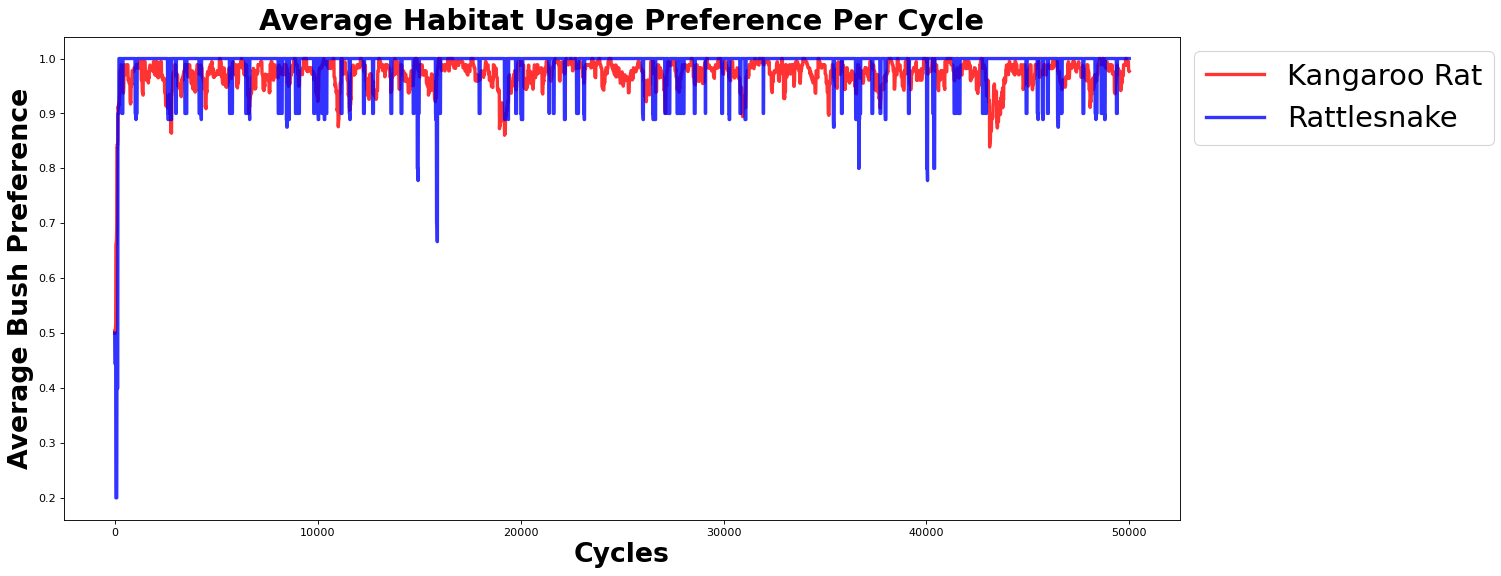

In [6]:
###### Normal Mean #############
df = exp2_kratdata[["cycle", "bush_pw"]].groupby("cycle").mean()
df = df.reset_index()
#df = df[df['cycle']>=40000]
df.columns = ['cycle','bush_pw']
df2 = exp2_snakedata[["cycle", "bush_pw"]].groupby("cycle").mean()
df2 = df2.reset_index()
#df2 = df2[df2['cycle']>=40000]
df2.columns = ['cycle','bush_pw']
#df2 = df2[df2['cycle']>=40000]


#Now switch to a more OO interface to exercise more features.
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24,
        'axes.titlesize' : 32,
        'axes.labelsize' : 14,
        'lines.linewidth' : 3,
        'lines.markersize' : 10,
        'xtick.labelsize' : 14,
        'ytick.labelsize' : 14}
fig = plt.figure(1,figsize=(18, 8), dpi=80)
ax = fig.add_subplot(111)
#fig.rcParams["figure.figsize"] = (18,8)
ax.plot(df['cycle'], df["bush_pw"],'red', linewidth=3, alpha=0.8, label = 'Kangaroo Rat')
ax.plot(df2['cycle'], df2["bush_pw"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
ax.set_xlabel("Cycles", fontsize=24, weight = 'bold')
ax.set_ylabel("Average Bush Preference", fontsize=24, weight = 'bold')
ax.set_title("Average Habitat Usage Preference Per Cycle", fontsize=26, weight = 'bold')
lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=26)
#plt.rcParams.update({'font.size': 30})
#fig.savefig('images/AHUPCycle.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.show()


In [28]:
########################### Time Series #########################
################### Krats##########################
# control
df_c = kratdata[["cycle", "bush_pw"]].groupby("cycle").mean()
df_c = df_c.reset_index()
df_c.columns = ['cycle','bush_pw']
#df_c = df_c[df_c['cycle']>=40000]
# Exp 1
df_exp1 = exp1_kratdata[["cycle", "bush_pw"]].groupby("cycle").mean()
df_exp1 = df_exp1.reset_index()
df_exp1.columns = ['cycle','bush_pw']
#df_exp1 = df_exp1[df_exp1['cycle']>=40000]
# Exp 2
df_exp2 = exp2_kratdata[["cycle", "bush_pw"]].groupby("cycle").mean()
df_exp2 = df_exp2.reset_index()
df_exp2.columns = ['cycle','bush_pw']
#df_exp2 = df_exp2[df_exp2['cycle']>=40000]
# Exp 3
df_exp3 = exp3_kratdata[["cycle", "bush_pw"]].groupby("cycle").mean()
df_exp3 = df_exp3.reset_index()
df_exp3.columns = ['cycle','bush_pw']
#df_exp3 = df_exp3[df_exp3['cycle']>=40000]

#################### Snakes ####################
# Control
df2_c = snakedata[["cycle", "bush_pw"]].groupby("cycle").mean()
df2_c = df2_c.reset_index()
df2_c.columns = ['cycle','bush_pw']
#df2_c = df2_c[df2_c['cycle']>=40000]
# Exp1
df2_exp1 = exp1_snakedata[["cycle", "bush_pw"]].groupby("cycle").mean()
df2_exp1 = df2_exp1.reset_index()
df2_exp1.columns = ['cycle','bush_pw']
#df2_exp1 = df2_exp1[df2_exp1['cycle']>=40000]
# Exp2
df2_exp2 = exp2_snakedata[["cycle", "bush_pw"]].groupby("cycle").mean()
df2_exp2 = df2_exp2.reset_index()
df2_exp2.columns = ['cycle','bush_pw']
#df2_exp2 = df2_exp2[df2_exp2['cycle']>=40000]
# Exp3
df2_exp3 = exp3_snakedata[["cycle", "bush_pw"]].groupby("cycle").mean()
df2_exp3 = df2_exp3.reset_index()
df2_exp3.columns = ['cycle','bush_pw']
#df2_exp3 = df2_exp3[df2_exp3['cycle']>=40000]

Text(0.5, 1.0, 'Exp1: 10 snakes 30 owls')

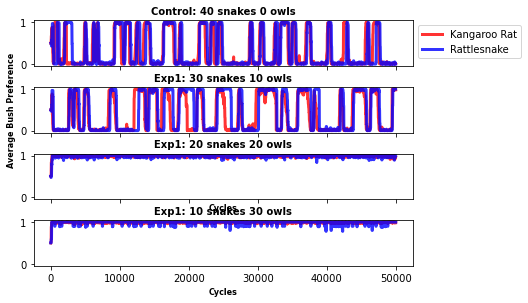

In [29]:
fig, axs = plt.subplots(4, sharex=True, sharey=True)
fig.tight_layout()
#control
axs[0].plot(df_c['cycle'], df_c["bush_pw"],'red', linewidth=3, alpha=0.8, label = 'Kangaroo Rat')
axs[0].plot(df2_c['cycle'], df2_c["bush_pw"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
#axs[0].set_xlabel("Cycles", fontsize=8, weight = 'bold')
#axs[0].set_ylabel("Average Bush Preference", fontsize=8, weight = 'bold')
axs[0].set_title("Control: 40 snakes 0 owls", fontsize=10, weight = 'bold')
lgd = axs[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
# exp1
axs[1].plot(df_exp1['cycle'], df_exp1["bush_pw"],'red', linewidth=3, alpha=0.8, label = 'Kangaroo Rat')
axs[1].plot(df2_exp1['cycle'], df2_exp1["bush_pw"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
#axs[1].set_xlabel("Cycles", fontsize=8, weight = 'bold')
axs[1].set_ylabel("Average Bush Preference", fontsize=8, weight = 'bold')
axs[1].set_title("Exp1: 30 snakes 10 owls", fontsize=10, weight = 'bold')
#lgd = axs[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
# exp2
axs[2].plot(df_exp2['cycle'], df_exp2["bush_pw"],'red', linewidth=3, alpha=0.8, label = 'Kangaroo Rat')
axs[2].plot(df2_exp2['cycle'], df2_exp2["bush_pw"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[2].set_xlabel("Cycles", fontsize=8, weight = 'bold')
#axs[2].set_ylabel("Average Bush Preference", fontsize=8, weight = 'bold')
axs[2].set_title("Exp1: 20 snakes 20 owls", fontsize=10, weight = 'bold')
#lgd = axs[2].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
# exp2
axs[3].plot(df_exp3['cycle'], df_exp3["bush_pw"],'red', linewidth=3, alpha=0.8, label = 'Kangaroo Rat')
axs[3].plot(df2_exp3['cycle'], df2_exp3["bush_pw"],'blue', linewidth=3, alpha=0.8, label = 'Rattlesnake')
axs[3].set_xlabel("Cycles", fontsize=8, weight = 'bold')
#axs[2].set_ylabel("Average Bush Preference", fontsize=8, weight = 'bold')
axs[3].set_title("Exp1: 10 snakes 30 owls", fontsize=10, weight = 'bold')
#lgd = axs[2].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)

In [41]:
###########################
### Rolling Population Average
###########################
################# Total Sim Bar Chart: Control ########################
kr_cycles = kratdata['cycle'].unique()
krat_rolling_avg = []
krat_rolling_std = []
for kr_cycle in kr_cycles:
    ktemp = kratdata[kratdata['cycle']<=kr_cycle]
    krat_avg_mh = ktemp['bush_pw'].mean()
    krat_rolling_avg.append(krat_avg_mh)
    krat_sterror = ktemp['bush_pw'].sem()
    krat_rolling_std.append(krat_sterror)

sn_cycles = snakedata['cycle'].unique()
snake_rolling_avg = []
snake_rolling_std = []
for sn_cycle in sn_cycles:
    stemp = snakedata[snakedata['cycle']<=sn_cycle]
    snake_avg_mh = stemp['bush_pw'].mean()
    snake_rolling_avg.append(snake_avg_mh)
    snake_sterror = stemp['bush_pw'].sem()
    snake_rolling_std.append(snake_sterror)

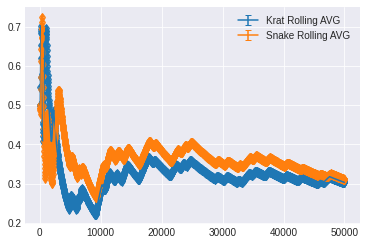

In [42]:
fig = plt.figure()

plt.errorbar(kr_cycles, krat_rolling_avg, yerr=krat_rolling_std, uplims=True, lolims=True,
             label='Krat Rolling AVG')
plt.errorbar(sn_cycles, snake_rolling_avg, yerr=snake_rolling_std, uplims=True, lolims=True,
             label='Snake Rolling AVG')

plt.legend()
plt.show()

In [5]:
data_path_krat_control_1 = 'owl_data/control_sim_1_krat_info.csv'
kratdata_c1=pd.read_csv(data_path_krat_control_1,header=None)
kratdata_c1.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
data_path_krat_control_2 = 'owl_data/control_sim_2_krat_info.csv'
kratdata_c2=pd.read_csv(data_path_krat_control_2,header=None)
kratdata_c2.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']


In [6]:
###########################
### Krat Rolling Population Average Control 
###########################
################# Total Sim Bar Chart: Control 0 ########################
kr_cycles = kratdata['cycle'].unique()
krat_rolling_avg = []
krat_rolling_std = []
for kr_cycle in kr_cycles:
    ktemp = kratdata[kratdata['cycle']<=kr_cycle]
    krat_avg_mh = ktemp['bush_pw'].mean()
    krat_rolling_avg.append(krat_avg_mh)
    krat_sterror = ktemp['bush_pw'].sem()
    krat_rolling_std.append(krat_sterror)
    
    
################# Total Sim Bar Chart: Control 1 ########################
kr_c1_cycles = kratdata_c1['cycle'].unique()
krat_c1_rolling_avg = []
krat_c1_rolling_std = []
for kr_c1_cycle in kr_c1_cycles:
    ktemp_c1 = kratdata_c1[kratdata_c1['cycle']<=kr_c1_cycle]
    krat_c1_avg_mh = ktemp_c1['bush_pw'].mean()
    krat_c1_rolling_avg.append(krat_c1_avg_mh)
    krat_c1_sterror = ktemp_c1['bush_pw'].sem()
    krat_c1_rolling_std.append(krat_c1_sterror)
    

################# Total Sim Bar Chart: Control 2 ########################
kr_c2_cycles = kratdata_c2['cycle'].unique()
krat_c2_rolling_avg = []
krat_c2_rolling_std = []
for kr_c2_cycle in kr_c2_cycles:
    ktemp_c2 = kratdata_c2[kratdata_c2['cycle']<=kr_c2_cycle]
    krat_c2_avg_mh = ktemp_c2['bush_pw'].mean()
    krat_c2_rolling_avg.append(krat_c2_avg_mh)
    krat_c2_sterror = ktemp_c2['bush_pw'].sem()
    krat_c2_rolling_std.append(krat_c2_sterror)

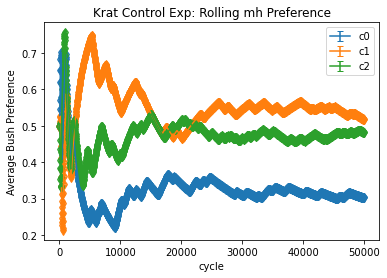

In [9]:
#############
## Krat Control Plot
#############

fig = plt.figure()

plt.errorbar(kr_cycles, krat_rolling_avg, yerr=krat_rolling_std, uplims=True, lolims=True,
             label='c0')
plt.errorbar(kr_c1_cycles, krat_c1_rolling_avg, yerr=krat_c1_rolling_std, uplims=True, lolims=True,
             label='c1')
plt.errorbar(kr_c2_cycles, krat_c2_rolling_avg, yerr=krat_c2_rolling_std, uplims=True, lolims=True,
             label='c2')
plt.ylabel('Average Bush Preference')
plt.xlabel('cycle')
plt.title('Krat Control Exp: Rolling mh Preference')

plt.legend()
plt.show()

In [8]:
data_path_snake_control_1 = 'owl_data/control_sim_1_snake_info.csv'
snakedata_c1=pd.read_csv(data_path_snake_control_1,header=None)
snakedata_c1.columns = ['snake_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']
data_path_snake_control_2 = 'owl_data/control_sim_2_krat_info.csv'
snakedata_c2=pd.read_csv(data_path_snake_control_2,header=None)
snakedata_c2.columns = ['snake_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']


###########################
### Snakes Rolling Population Average Control 
###########################
################# Total Sim Bar Chart: Control 0 ########################
sn_cycles = snakedata['cycle'].unique()
snake_rolling_avg = []
snake_rolling_std = []
for sn_cycle in sn_cycles:
    stemp = snakedata[snakedata['cycle']<=sn_cycle]
    snake_avg_mh = stemp['bush_pw'].mean()
    snake_rolling_avg.append(snake_avg_mh)
    snake_sterror = stemp['bush_pw'].sem()
    snake_rolling_std.append(snake_sterror)
    
    
################# Total Sim Bar Chart: Control 1 ########################
sn_c1_cycles = snakedata_c1['cycle'].unique()
snake_c1_rolling_avg = []
snake_c1_rolling_std = []
for sn_c1_cycle in sn_c1_cycles:
    stemp_c1 = snakedata_c1[snakedata_c1['cycle']<=sn_c1_cycle]
    snake_c1_avg_mh = stemp_c1['bush_pw'].mean()
    snake_c1_rolling_avg.append(snake_c1_avg_mh)
    snake_c1_sterror = stemp_c1['bush_pw'].sem()
    snake_c1_rolling_std.append(snake_c1_sterror)
    

################# Total Sim Bar Chart: Control 2 ########################
sn_c2_cycles = snakedata_c2['cycle'].unique()
snake_c2_rolling_avg = []
snake_c2_rolling_std = []
for sn_c2_cycle in sn_c2_cycles:
    stemp_c2 = snakedata_c2[snakedata_c2['cycle']<=sn_c2_cycle]
    snake_c2_avg_mh = stemp_c2['bush_pw'].mean()
    snake_c2_rolling_avg.append(snake_c2_avg_mh)
    snake_c2_sterror = stemp_c2['bush_pw'].sem()
    snake_c2_rolling_std.append(snake_c2_sterror)

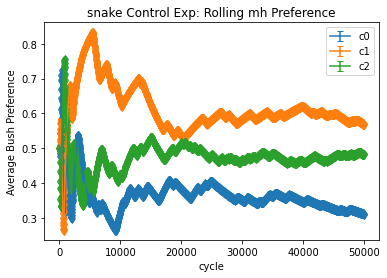

In [15]:
##########
## Snake Control Plot
##########

fig = plt.figure()

plt.errorbar(sn_cycles, snake_rolling_avg, yerr=snake_rolling_std, uplims=True, lolims=True,
             label='c0')
plt.errorbar(sn_c1_cycles, snake_c1_rolling_avg, yerr=snake_c1_rolling_std, uplims=True, lolims=True,
             label='c1')
plt.errorbar(sn_c2_cycles, snake_c2_rolling_avg, yerr=snake_c2_rolling_std, uplims=True, lolims=True,
             label='c2')
plt.ylabel('Average Bush Preference')
plt.xlabel('cycle')
plt.title('snake Control Exp: Rolling mh Preference')

plt.legend()
plt.show()

NameError: name 'kr_cycles' is not defined

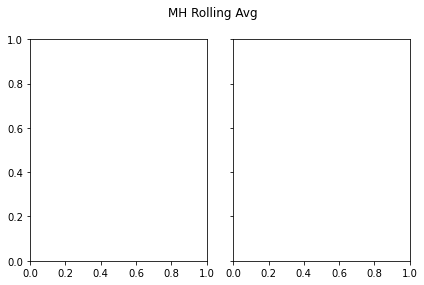

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.suptitle('MH Rolling Avg')
fig.tight_layout()

ax1.errorbar(kr_cycles, krat_rolling_avg, yerr=krat_rolling_std, uplims=True, lolims=True,
             label='c0')
ax1.errorbar(kr_c1_cycles, krat_c1_rolling_avg, yerr=krat_c1_rolling_std, uplims=True, lolims=True,
             label='c1')
ax1.errorbar(kr_c2_cycles, krat_c2_rolling_avg, yerr=krat_c2_rolling_std, uplims=True, lolims=True,
             label='c2')
ax1.set_ylabel('Average Bush Preference')
ax1.set_xlabel('cycle')
ax1.set_title('krat')
ax2.errorbar(sn_cycles, snake_rolling_avg, yerr=snake_rolling_std, uplims=True, lolims=True,
             label='c0')
ax2.errorbar(sn_c1_cycles, snake_c1_rolling_avg, yerr=snake_c1_rolling_std, uplims=True, lolims=True,
             label='c1')
ax2.errorbar(sn_c2_cycles, snake_c2_rolling_avg, yerr=snake_c2_rolling_std, uplims=True, lolims=True,
             label='c2')
ax2.set_title('Snake')
plt.legend()
plt.show()
#plt.title('Krat Control Exp: Rolling mh Preference')

Text(0.5, 1.0, 'EXP 1')

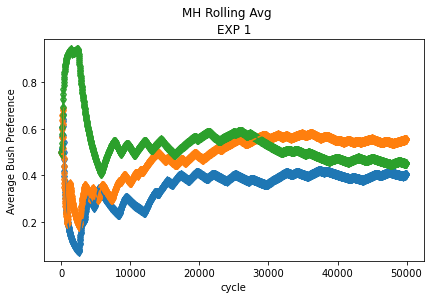

In [30]:
################# Rolling mh pref Chart: exp1 ########################
#sim1
exp1_data_path_krat_sim_1 = 'owl_data/experiment_1_sim_1_krat_info.csv'
exp1_kratdata_sim_1=pd.read_csv(exp1_data_path_krat_sim_1,header=None)
exp1_kratdata_sim_1.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
#sim 2
exp1_data_path_krat_sim_2 = 'owl_data/experiment_1_sim_2_krat_info.csv'
exp1_kratdata_sim_2=pd.read_csv(exp1_data_path_krat_sim_2,header=None)
exp1_kratdata_sim_2.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
###########################
### Rolling Population Average
###########################

#Sim 0
sim0_kr_cycles = exp1_kratdata['cycle'].unique()
sim0_krat_rolling_avg = []
sim0_krat_rolling_std = []
for sim0_kr_cycle in sim0_kr_cycles:
    sim0_ktemp = exp1_kratdata[exp1_kratdata['cycle']<=sim0_kr_cycle]
    sim0_krat_avg_mh = sim0_ktemp['bush_pw'].mean()
    sim0_krat_rolling_avg.append(sim0_krat_avg_mh)
    sim0_krat_sterror = sim0_ktemp['bush_pw'].sem()
    sim0_krat_rolling_std.append(sim0_krat_sterror)
    
# SIM 1
sim1_kr_cycles = exp1_kratdata_sim_1['cycle'].unique()
sim1_krat_rolling_avg = []
sim1_krat_rolling_std = []
for sim1_kr_cycle in sim1_kr_cycles:
    sim1_ktemp = exp1_kratdata_sim_1[exp1_kratdata_sim_1['cycle']<=sim1_kr_cycle]
    sim1_krat_avg_mh = sim1_ktemp['bush_pw'].mean()
    sim1_krat_rolling_avg.append(sim1_krat_avg_mh)
    sim1_krat_sterror = sim1_ktemp['bush_pw'].sem()
    sim1_krat_rolling_std.append(sim1_krat_sterror)
    
# SIM 2
sim2_kr_cycles = exp1_kratdata_sim_2['cycle'].unique()
sim2_krat_rolling_avg = []
sim2_krat_rolling_std = []
for sim2_kr_cycle in sim2_kr_cycles:
    sim2_ktemp = exp1_kratdata_sim_2[exp1_kratdata_sim_2['cycle']<=sim2_kr_cycle]
    sim2_krat_avg_mh = sim2_ktemp['bush_pw'].mean()
    sim2_krat_rolling_avg.append(sim2_krat_avg_mh)
    sim2_krat_sterror = sim2_ktemp['bush_pw'].sem()
    sim2_krat_rolling_std.append(sim2_krat_sterror)
    
#### EXP 1
fig, ax1 = plt.subplots(1)
fig.suptitle('MH Rolling Avg')
fig.tight_layout()

ax1.errorbar(sim0_kr_cycles, sim0_krat_rolling_avg, yerr=sim0_krat_rolling_std, uplims=True, lolims=True,
             label='sim0')
ax1.errorbar(sim1_kr_cycles, sim1_krat_rolling_avg, yerr=sim1_krat_rolling_std, uplims=True, lolims=True,
             label='sim1')
ax1.errorbar(sim2_kr_cycles, sim2_krat_rolling_avg, yerr=sim2_krat_rolling_std, uplims=True, lolims=True,
             label='sim2')
ax1.set_title('EXP 1')
ax1.set_ylabel('Average Bush Preference')
ax1.set_xlabel('cycle')


In [28]:
################# Rolling mh pref Chart: exp1 ########################
#sim1
exp2_data_path_krat_sim_1 = 'owl_data/experiment_2_sim_1_krat_info.csv'
exp2_kratdata_sim_1=pd.read_csv(exp2_data_path_krat_sim_1,header=None)
exp2_kratdata_sim_1.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
#sim 2
exp2_data_path_krat_sim_2 = 'owl_data/experiment_2_sim_2_krat_info.csv'
exp2_kratdata_sim_2=pd.read_csv(exp2_data_path_krat_sim_2,header=None)
exp2_kratdata_sim_2.columns = ['krat_id','generation', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
###########################
### Rolling Population Average
###########################

#Sim 0
sim0_kr_cycles = exp2_kratdata['cycle'].unique()
sim0_krat_rolling_avg = []
sim0_krat_rolling_std = []
for sim0_kr_cycle in sim0_kr_cycles:
    sim0_ktemp = exp2_kratdata[exp2_kratdata['cycle']<=sim0_kr_cycle]
    sim0_krat_avg_mh = sim0_ktemp['bush_pw'].mean()
    sim0_krat_rolling_avg.append(sim0_krat_avg_mh)
    sim0_krat_sterror = sim0_ktemp['bush_pw'].sem()
    sim0_krat_rolling_std.append(sim0_krat_sterror)
    
# SIM 1
sim1_kr_cycles = exp2_kratdata_sim_1['cycle'].unique()
sim1_krat_rolling_avg = []
sim1_krat_rolling_std = []
for sim1_kr_cycle in sim1_kr_cycles:
    sim1_ktemp = exp2_kratdata_sim_1[exp2_kratdata_sim_1['cycle']<=sim1_kr_cycle]
    sim1_krat_avg_mh = sim1_ktemp['bush_pw'].mean()
    sim1_krat_rolling_avg.append(sim1_krat_avg_mh)
    sim1_krat_sterror = sim1_ktemp['bush_pw'].sem()
    sim1_krat_rolling_std.append(sim1_krat_sterror)
    
# SIM 2
sim2_kr_cycles = exp2_kratdata_sim_2['cycle'].unique()
sim2_krat_rolling_avg = []
sim2_krat_rolling_std = []
for sim2_kr_cycle in sim2_kr_cycles:
    sim2_ktemp = exp2_kratdata_sim_2[exp2_kratdata_sim_2['cycle']<=sim2_kr_cycle]
    sim2_krat_avg_mh = sim2_ktemp['bush_pw'].mean()
    sim2_krat_rolling_avg.append(sim2_krat_avg_mh)
    sim2_krat_sterror = sim2_ktemp['bush_pw'].sem()
    sim2_krat_rolling_std.append(sim2_krat_sterror)
    
    
fig, ax1 = plt.subplots(1)
fig.suptitle('MH Rolling Avg')
fig.tight_layout()

ax1.errorbar(sim0_kr_cycles, sim0_krat_rolling_avg, yerr=sim0_krat_rolling_std, uplims=True, lolims=True,
             label='sim0')
ax1.errorbar(sim1_kr_cycles, sim1_krat_rolling_avg, yerr=sim1_krat_rolling_std, uplims=True, lolims=True,
             label='sim1')
ax1.errorbar(sim2_kr_cycles, sim2_krat_rolling_avg, yerr=sim2_krat_rolling_std, uplims=True, lolims=True,
             label='sim2')
ax1.set_ylabel('Average Bush Preference')
ax1.set_xlabel('cycle')
ax1.set_title('EXP 2')

Text(0.5, 1.0, 'EXP 2')

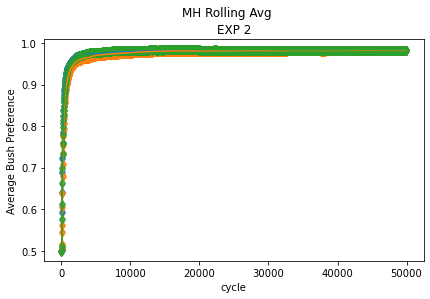

In [40]:
###### harmonic Mean #############
df = kratdata[["cycle", "bush_pw"]].groupby("cycle")
df.head()
def harmonic_mean(df,cycle):
    
#df = df[df['cycle']>=80000]
# df.columns = ['cycle','bush_pw']
# df2 = snakedata[["cycle", "bush_pw"]].groupby("cycle").apply(stats.hmean)
# df2 = df2.reset_index()
# df2.columns = ['cycle','bush_pw']
# #df2 = df2[df2['cycle']>=80000]


# #Now switch to a more OO interface to exercise more features.
# plt.plot(df['cycle'], df["bush_pw"],'red', linewidth=.8, alpha=0.8, label = 'krat')
# plt.plot(df2['cycle'], df2["bush_pw"],'blue', linewidth=.8, alpha=0.8, label = 'snake')
# plt.xlabel("cycles")
# plt.ylabel("Average Bush Preference")
# plt.title("Average Habitat Usage by Genotype")
# plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')
# plt.show()

,cycle,bush_pw
0,0,1.0
1,0,0.0
2,0,1.0
3,0,1.0
4,0,0.0
...,...,...
31073,9950,1.0
31074,9950,1.0
31075,9950,1.0
31076,9950,1.0


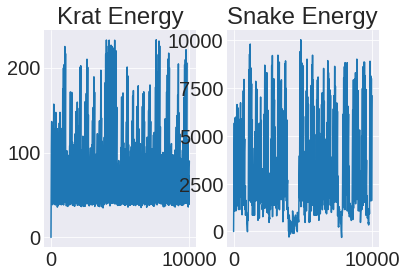

In [20]:
########## Population energy ###############
df = kratdata[["cycle","energy_score"]].groupby("cycle").mean()
df = df.reset_index()
df.columns = ['cycle','energy_score']
df2 = snakedata[["cycle", "energy_score"]].groupby("cycle").mean()
df2 = df2.reset_index()
df2.columns = ['cycle','energy_score']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[1]
ax.plot(df2['cycle'], df2['energy_score'])
ax.set_title('Snake Energy')


ax = axs[0]
ax.plot(df['cycle'], df['energy_score'])
ax.set_title('Krat Energy')
plt.show()

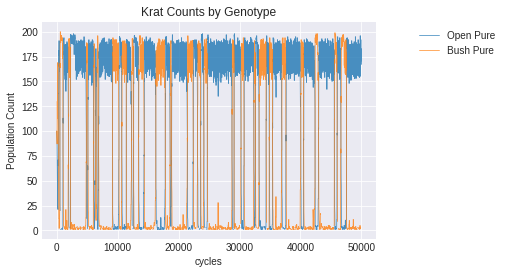

In [30]:
###########################
## Krat Counts By Genotype
##############################
kratdata["bush_pw_clean"] = round(kratdata["bush_pw"],1)
df = kratdata.groupby(["cycle", "bush_pw_clean"]).krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','bush_pw', "Pop Count"]
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
#df = df.fillna(0)
col_name = []
color_dict = {}
color_change = 5

blue_counter = 1
red_counter = 1
rand_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,15,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,15,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
# style
plt.style.use('seaborn-darkgrid')

plt.figure()
for i in cols:
    s = rgb_to_hex(color_dict[i])
    #plt.plot(df['cycle'], df[i],s.upper(), linewidth=.8, alpha=0.8, label = i)
    #plt.scatter(df['cycle'], df[i], alpha=0.8 , label = i)
    plt.plot(df['cycle'], df[i], linewidth=.8, alpha=0.8, label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Krat Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

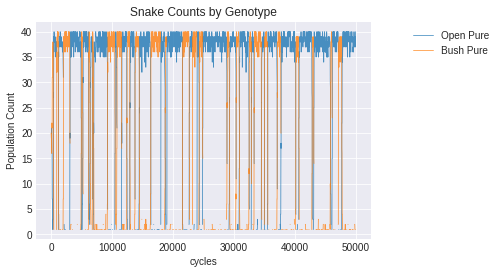

In [31]:
###########################
## Snake Counts By Genotype
##############################
df = snakedata.groupby(["cycle", "bush_pw"]).snake_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
#df = df[df['cycle']<=1000]
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.plot(df['cycle'], df[i], linewidth=.8, alpha=0.8,  label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Snake Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

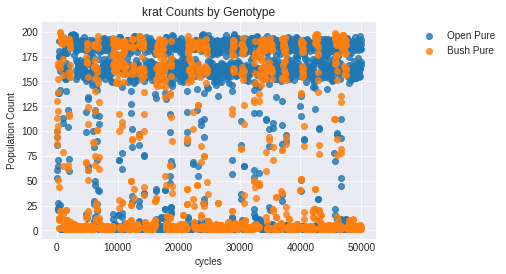

In [32]:
########################################
######## Krat Count Dot Plot ##########
########################################
df = kratdata.groupby(["cycle", "bush_pw"]).krat_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.scatter(df['cycle'], df[i], alpha=0.8 , label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("krat Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

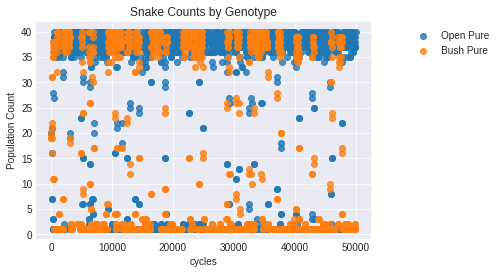

In [33]:
########################################
######## Snake Count Dot Plot ##########
########################################
df = snakedata.groupby(["cycle", "bush_pw"]).snake_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.scatter(df['cycle'], df[i], alpha=0.8 , label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Snake Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()